In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial import distance

In [19]:
!ls -l data

total 125724
-rw-rw-r-- 1 leibnitz.rojas hadoopgroup  1186727 set 25 23:04 AmenitiesGrafoCusco.csv
-rw-rw-r-- 1 leibnitz.rojas hadoopgroup  1185519 ago 17 22:26 AmenitiesGrafoTransporte.csv
-rw-rw-r-- 1 leibnitz.rojas hadoopgroup   138838 ago 31 21:45 CuscoMinValues2Amenities.csv
-rw-rw-r-- 1 leibnitz.rojas hadoopgroup  7834805 jul 31 23:23 EdgesCusco_wazeinfo.csv
-rw-rw-r-- 1 leibnitz.rojas hadoopgroup  6769459 ago  8 21:43 GrafoCusco_edges.csv
-rw-rw-r-- 1 leibnitz.rojas hadoopgroup  7839841 ago 12 10:45 GrafoCusco_edgeswaze0800.csv
-rw-rw-r-- 1 leibnitz.rojas hadoopgroup  7835767 ago 13 10:07 GrafoCusco_edgeswaze1400.csv
-rw-rw-r-- 1 leibnitz.rojas hadoopgroup  9093449 ago 23 22:47 GrafoCusco_edgeswaze.csv
-rw-rw-r-- 1 leibnitz.rojas hadoopgroup  1824005 ago 23 22:49 GrafoCusco_edgeswaze.zip
-rw-rw-r-- 1 leibnitz.rojas hadoopgroup   730523 ago  8 21:43 GrafoCusco_nodes.csv
-rw-rw-r-- 1 leibnitz.rojas hadoopgroup   181126 ago 23 22:50 GrafoCusco_nodes.zip
-rw-rw-r-- 1 leibnitz.rojas 

In [20]:
amenities = ['school', 'university', 'bank', 'courthouse', 'hospital', 'police']
def readamenity(amenity):
    df = pd.read_csv(f"data/wazeresultsgrafocusco_{amenity}.csv", sep=';',)
    df['amenity'] = amenity
    return df
    
amenities_data = [readamenity(var) for var in amenities]

In [21]:
amenities_data[0]

,source,target,wazeinfo0800_minutes,wazeinfo0800_km,wazeinfo1400_minutes,wazeinfo1400_km,tiempoponderado30kmh,amenity
0,4427186178,4293677040,6.716667,3.149,6.700000,3.149,6.298,school
1,4427186178,3738278157,7.400000,3.404,7.383333,3.404,6.808,school
2,4427186178,1005309702,6.866667,3.934,6.466667,3.933,7.868,school
3,4477353987,4293677040,4.300000,2.381,4.266667,2.381,4.762,school
4,4477353987,3738278157,6.833333,3.217,6.833333,3.217,6.434,school
...,...,...,...,...,...,...,...,...
30568,10654220284,3738278157,3.900000,0.845,3.433333,0.845,1.690,school
30569,10654220284,1005309702,3.100000,1.048,3.166667,1.048,2.096,school
30570,4477353983,4293677040,2.966667,1.052,2.950000,1.052,2.104,school
30571,4477353983,3738278157,3.650000,1.602,3.466667,1.581,3.204,school


In [22]:
data = pd.concat(amenities_data, ignore_index=True)
data

,source,target,wazeinfo0800_minutes,wazeinfo0800_km,wazeinfo1400_minutes,wazeinfo1400_km,tiempoponderado30kmh,amenity
0,4427186178,4293677040,6.716667,3.149,6.700000,3.149,6.298,school
1,4427186178,3738278157,7.400000,3.404,7.383333,3.404,6.808,school
2,4427186178,1005309702,6.866667,3.934,6.466667,3.933,7.868,school
3,4477353987,4293677040,4.300000,2.381,4.266667,2.381,4.762,school
4,4477353987,3738278157,6.833333,3.217,6.833333,3.217,6.434,school
...,...,...,...,...,...,...,...,...
183433,10654220284,3738278157,26.950000,13.318,27.733333,13.317,26.636,police
183434,10654220284,1005309702,17.633333,7.848,17.600000,7.847,15.696,police
183435,4477353983,4293677040,1.616667,0.531,1.600000,0.531,1.062,police
183436,4477353983,3738278157,3.850000,1.297,3.600000,1.297,2.594,police


In [23]:
data.max()

source                  11047357300
target                   4293677040
wazeinfo0800_minutes           89.8
wazeinfo0800_km              54.303
wazeinfo1400_minutes           86.8
wazeinfo1400_km              51.323
tiempoponderado30kmh        101.498
amenity                  university
dtype: object

In [24]:
data.fillna(99, inplace=True)

In [25]:
# data.columns
wazecols = ['wazeinfo0800_km', 'wazeinfo1400_minutes',
            'wazeinfo1400_km', 'wazeinfo0800_minutes', 
            'tiempoponderado30kmh']
data.query("amenity=='bank'").dropna(subset=wazecols, axis=0)

,source,target,wazeinfo0800_minutes,wazeinfo0800_km,wazeinfo1400_minutes,wazeinfo1400_km,tiempoponderado30kmh,amenity
61146,4427186178,4293677040,3.066667,1.974,3.050000,1.974,3.948,bank
61147,4427186178,3738278157,3.250000,2.006,3.666667,2.006,4.012,bank
61148,4427186178,1005309702,5.733333,2.842,5.783333,2.842,5.684,bank
61149,4477353987,4293677040,5.733333,2.842,5.783333,2.842,5.684,bank
61150,4477353987,3738278157,3.650000,2.212,3.633333,2.212,4.424,bank
...,...,...,...,...,...,...,...,...
91714,10654220284,3738278157,11.783333,8.493,11.400000,8.493,16.986,bank
91715,10654220284,1005309702,15.100000,9.496,14.933333,9.496,18.992,bank
91716,4477353983,4293677040,11.766667,8.440,11.383333,8.440,16.880,bank
91717,4477353983,3738278157,13.066667,8.953,12.950000,8.953,17.906,bank


In [26]:
datamin_list = []
for column in ['wazeinfo0800_km', 'wazeinfo1400_minutes',
               'wazeinfo1400_km', 'wazeinfo0800_minutes', 'tiempoponderado30kmh']:
    
#     column = 'wazeinfo0800_km'
#     cond = data['amenity']=='bank'
    grouped = data.groupby(['source', 'amenity'])
    min_indices = grouped[column].idxmin()
#     min_rows = data.loc[min_indices.dropna()]
    min_rows = data.loc[min_indices]

    columns = ['source', 'amenity', column ]
    datamin_list.append(min_rows[columns].set_index('source'))

In [27]:
# data_min[0].set_index('source')

In [28]:
datamin = pd.concat(datamin_list, axis=1)
datamin = datamin.loc[:,~datamin.columns.duplicated()]
datamin

,amenity,wazeinfo0800_km,wazeinfo1400_minutes,wazeinfo1400_km,wazeinfo0800_minutes,tiempoponderado30kmh
source,,,,,,
30962246,bank,2.315,5.500000,2.314,5.150000,4.630
30962246,courthouse,1.822,3.850000,1.822,3.800000,3.644
30962246,hospital,0.339,1.133333,0.339,0.900000,0.678
30962246,police,5.164,9.566667,4.833,11.500000,10.328
30962246,school,2.228,6.100000,2.241,6.683333,4.456
...,...,...,...,...,...,...
11047357300,courthouse,5.606,10.383333,5.606,12.016667,10.212
11047357300,hospital,0.397,0.833333,0.397,0.866667,0.794
11047357300,police,4.430,11.316667,4.430,11.583333,8.860


In [29]:
# datamin.to_csv("data/CuscoMinValues2Amenities.csv", sep=';')

In [30]:
datamin['amenity'].unique()

array(['bank', 'courthouse', 'hospital', 'police', 'school', 'university'],
      dtype=object)

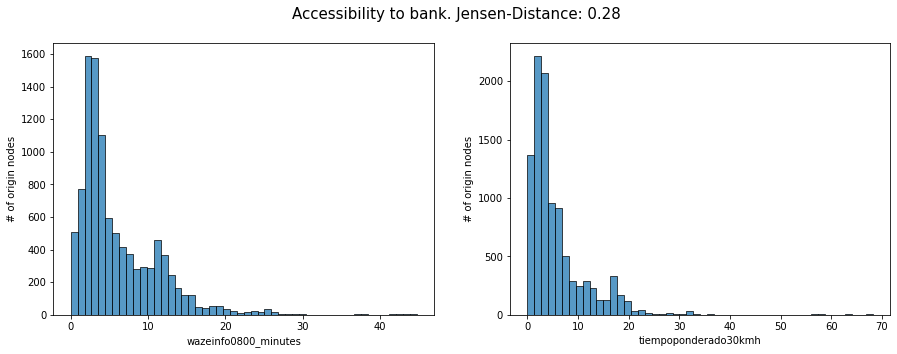

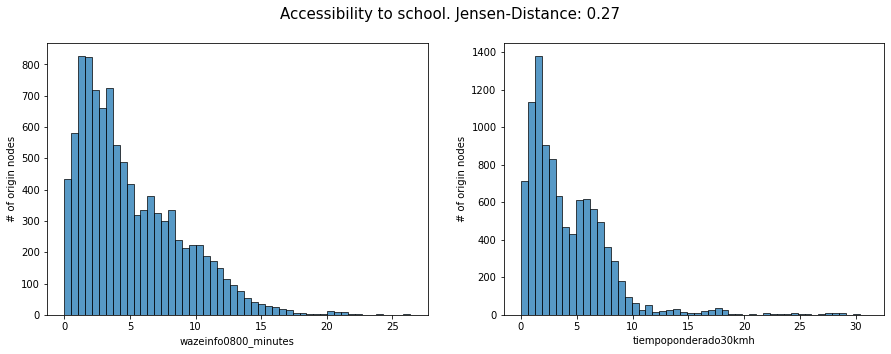

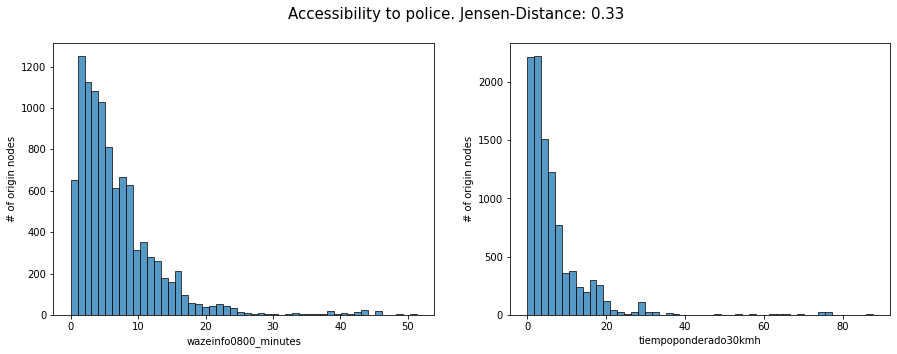

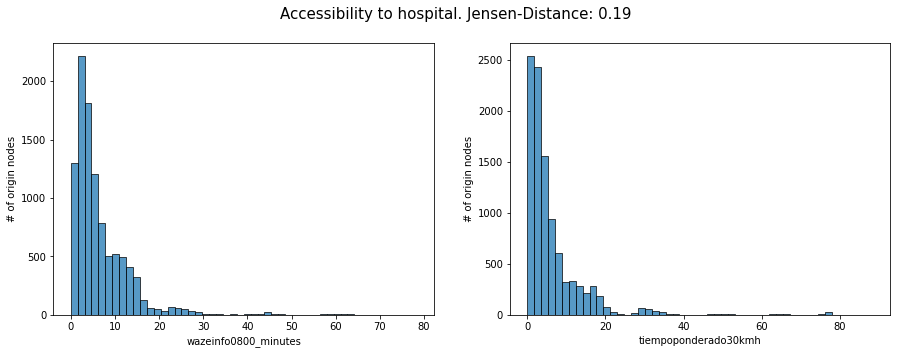

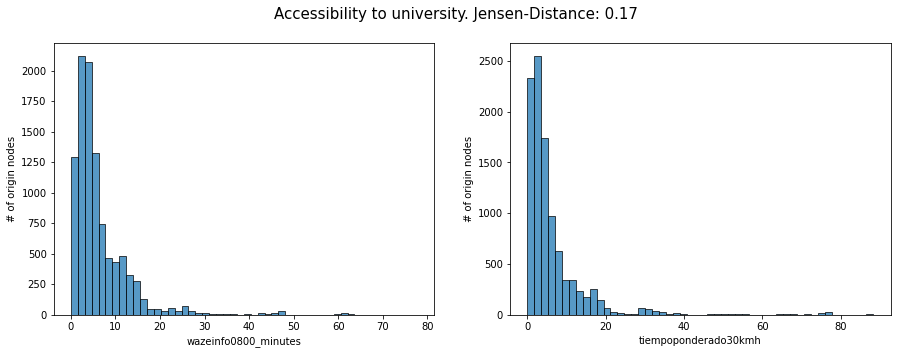

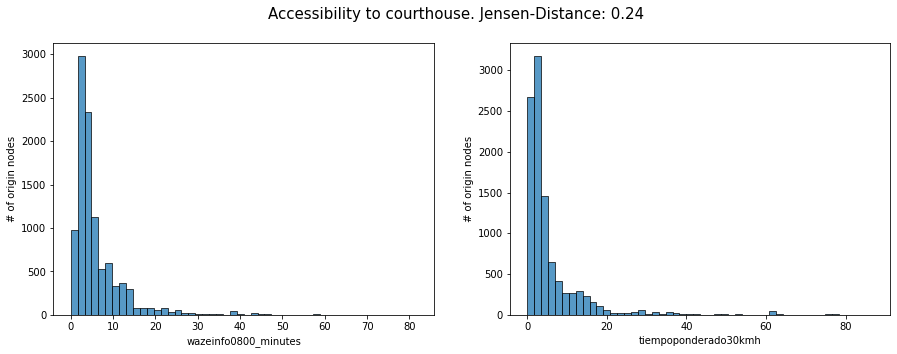

In [31]:
jensen_distances = {}
for amenity in ['bank', 'school', 'police', 'hospital', 'university', 'courthouse']:

    fig, axes = plt.subplots(1,2, figsize=(15,5))
#     amenity = 'university'
    df = datamin.query("amenity == @amenity")
    
    bins=50
    
    hist08, bin_edges08 = np.histogram(df['wazeinfo0800_minutes'], density=True, bins=bins)
    hist14, bin_edges14 = np.histogram(df['tiempoponderado30kmh'], density=True, bins=bins)

    jensendistance = distance.jensenshannon(hist08, hist14, 2)
    jensen_distances[amenity] = jensendistance

    sns.histplot(data=df, x='wazeinfo0800_minutes', ax=axes[0], bins=bins)
    sns.histplot(data=df, x='tiempoponderado30kmh', ax=axes[1], bins=bins)

    axes[0].set_ylabel("# of origin nodes")
    axes[1].set_ylabel("# of origin nodes")
    # axes[1].set_title()

    fig.suptitle(f'Accessibility to {amenity}. Jensen-Distance: {jensendistance:.2f} ', fontsize=15)
    plt.show()
    fig.savefig(f"img/cusco_accessibility_minutes_{amenity}.png")    

In [162]:
data.query("amenity=='school' and source == 30962246").sort_values('wazeinfo0800_minutes')

,source,target,wazeinfo0800_km,wazeinfo1400_minutes,wazeinfo1400_km,wazeinfo0800_minutes,amenity
307802,30962246,2357195908,0.056,0.183333,0.056,0.150000,school
307774,30962246,30962251,0.096,0.266667,0.096,0.233333,school
307775,30962246,30962252,0.096,0.266667,0.096,0.233333,school
307866,30962246,30962459,0.326,0.816667,0.326,0.766667,school
307869,30962246,30962463,0.336,0.833333,0.336,0.783333,school
...,...,...,...,...,...,...,...
307770,30962246,30964801,99.000,99.000000,99.000,99.000000,school
307928,30962246,30964727,99.000,99.000000,99.000,99.000000,school
307929,30962246,1003614644,99.000,99.000000,99.000,99.000000,school
307914,30962246,993167755,99.000,99.000000,99.000,99.000000,school


In [156]:
wazecols = ['wazeinfo0800_km', 'wazeinfo1400_minutes','wazeinfo1400_km', 'wazeinfo0800_minutes']
data.query("amenity=='courthouse'") #.dropna(subset=wazecols, axis=0)

,source,target,wazeinfo0800_km,wazeinfo1400_minutes,wazeinfo1400_km,wazeinfo0800_minutes,amenity
661640,4427153413,441230275,99.000,99.000000,99.000,99.000000,courthouse
661641,4427153413,3738278157,99.000,99.000000,99.000,99.000000,courthouse
661642,4427153413,30985399,99.000,99.000000,99.000,99.000000,courthouse
661643,10232315911,441230275,2.200,6.200000,2.200,7.100000,courthouse
661644,10232315911,3738278157,1.613,3.783333,1.613,3.950000,courthouse
...,...,...,...,...,...,...,...
668724,588513256,3738278157,5.857,12.600000,5.856,12.966667,courthouse
668725,588513256,30985399,99.000,99.000000,99.000,99.000000,courthouse
668726,30965748,441230275,4.651,11.216667,4.651,11.200000,courthouse
668727,30965748,3738278157,1.178,5.100000,1.178,5.600000,courthouse


<AxesSubplot:xlabel='wazeinfo0800_km', ylabel='Density'>

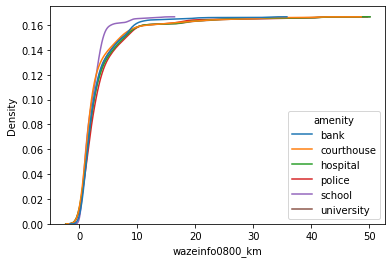

In [189]:
sns.kdeplot(data=datamin, x='wazeinfo0800_km', hue='amenity', cumulative=True)

/home/leibnitz.rojas/.local/lib/python3.6/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='wazeinfo1400_km', ylabel='Density'>

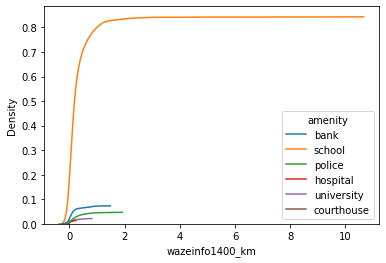

In [103]:
sns.kdeplot(data=datamin, x='wazeinfo1400_km',  cumulative=True, hue='amenity')

/home/leibnitz.rojas/.local/lib/python3.6/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='wazeinfo0800_minutes', ylabel='Density'>

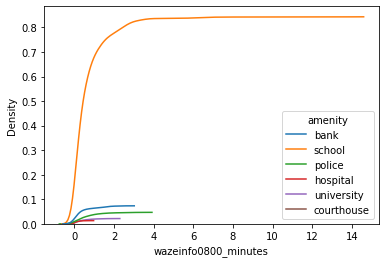

In [104]:
sns.kdeplot(data=datamin, x='wazeinfo0800_minutes',  cumulative=True, hue='amenity')

<AxesSubplot:xlabel='wazeinfo1400_minutes', ylabel='Density'>

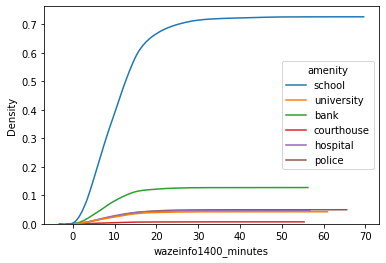

In [35]:
sns.kdeplot(data=data, x='wazeinfo1400_minutes',  cumulative=True, hue='amenity')

In [12]:
var_amenity = 'school'
data = pd.read_csv(f"data/wazeresults_{var_amenity}.csv", sep=';',)

In [13]:
data

,source,target,wazeinfo0800_km,wazeinfo1400_minutes,wazeinfo1400_km,wazeinfo0800_minutes
0,4427153413,993167872,NaN,NaN,NaN,NaN
1,4427153413,2735769089,NaN,NaN,NaN,NaN
2,4427153413,3739432963,NaN,NaN,NaN,NaN
3,4427153413,30983685,NaN,NaN,NaN,NaN
4,4427153413,4590287365,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
543485,30965748,30983670,1.281,5.00,1.281,5.333333
543486,30965748,30983671,1.283,5.00,1.283,5.333333
543487,30965748,30964728,NaN,NaN,NaN,NaN
543488,30965748,4428261882,3.736,11.80,3.736,12.200000


In [14]:
data['source'].nunique()

2363

<AxesSubplot:xlabel='wazeinfo0800_km', ylabel='Count'>

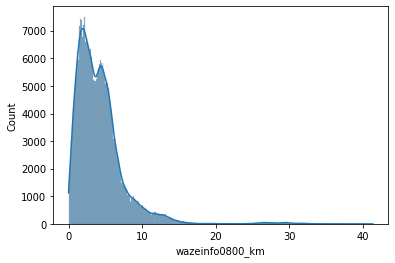

In [18]:
sns.histplot(data=data, x='wazeinfo0800_km', kde=True)

<AxesSubplot:xlabel='wazeinfo0800_km', ylabel='Density'>

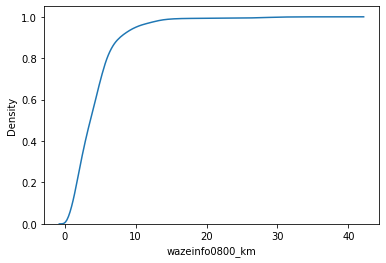

In [19]:
sns.kdeplot(data=data, x='wazeinfo0800_km',  cumulative=True,)